# Progetto Finale di Introduzione alla Data Science

Autore: Lorenzo La Corte - S4784539

Dataset: **Google Play Store Apps**

Importo le librerie di base:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
# !pip install scipy==1.7.0
import scipy
print (scipy.__version__)

1.7.1


Importo il dataset pulito:

In [3]:
playstore = pd.read_csv('googleplaystore_clean.csv') 

## Comunicare con i Dati

Abbiamo visto che esistono diverse modalita' di visualizzazione dei dati. 

In base al tipo di dato, alcune sono appropriate, altre possono non esserlo. 

La visualizzazione dei dati dipende da cosa vogliamo **comunicare**
con i dati. 

Cominciamo con un'informazione di base. Riusciamo a capire quale e' la **distribuzione** dei premi vinti dagli studenti? 

Dobbiamo fare un conteggio, e poi visualizzare nel modo opportuno. 

**tip** Anche qui, potete riguardare lo scorso laboratorio. 

<AxesSubplot:>

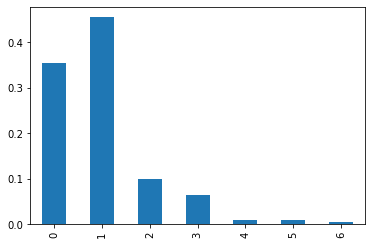

In [59]:
# codice qui
num_awards = Awards['num_awards'].value_counts(normalize=True).reindex(np.asarray(range(7)))
num_awards.plot(kind = 'bar')

#### E' un diagramma a barre perché sto considerando una variabile e ne sto rappresentando la frequenza.
Esistono altri due metodi per fare questo plot. 

Ne vediamo uno insieme.

<BarContainer object of 7 artists>

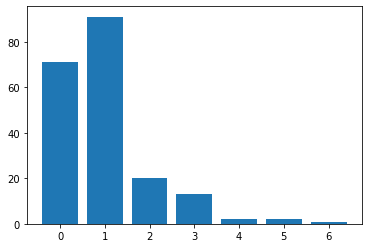

In [60]:
histo = np.histogram(Awards['num_awards'],bins=7)
plt.bar(x=np.asarray(range(7)),height=histo[0])

L'altro consiste nell'usare la funzione 'hist' della libreria matplotlib. Provate a farlo!

(array([71., 91.,  0., 20.,  0., 13.,  2.,  0.,  2.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

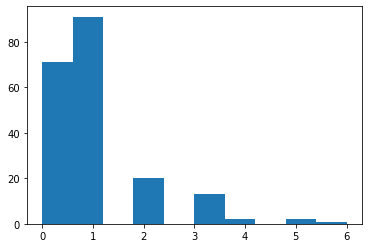

In [61]:
#codice qui 
plt.hist(Awards['num_awards'])

## Correlazione tra: punteggio in matematica e numero di awards vinti

Ora vi chiediamo. Esiste una correlazione tra punteggio in matematica e numero di awards vinti? 
Cercate una visualizzazione appropriata, e provate a dare una risposta. 


* Visualizzate la relazione esistente tra voto in matematica e numero di premi vinti, utilizzando un grafico a dispersione, e commentate se questa modalita' possa essere appropriata oppure no.  

### Grafico a dispersione: numero di premi vinti in relazione al punteggio di matematica

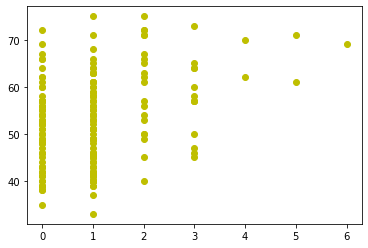

In [62]:
#codice qui 
plt.scatter(Awards['num_awards'], Awards['math'], color = 'y') # crea un grafico a dispersione (asse x, asse y)

#### Ipotesi
Sembrerebbe che all'aumentare del numero di premi si diminuisca la variabilità dei voti in matematica:
chi ne ha vinti 0 ha un range grandissimo di voto, chi ne ha vinti tanti tendenzialmente ha un buon voto.

Possiamo dire che probabilmente ci sia correlazione ma non causalità: lo studente che ha vinto 6 premi ha un voto di matematica minore dello studenti con il miglior voto che ne ha vinti 0.

Bene, abbiamo tratto le nostre conclusioni. Cerchiamo una rappresentazione alternativa, usando un grafico a barre. 

**tip** potete visualizzare la media' del voto in matematica, **raggruppando** gli studenti per numero di awards vinti. 


In pandas, la funzione da utilizzare (come visto lo scorso lab) e' groupby(series_to_group).series_of_interest.mean().plot(...)

### Grafico a barre: media del voto in matematica in funzione del numero di premi vinti

<AxesSubplot:xlabel='num_awards'>

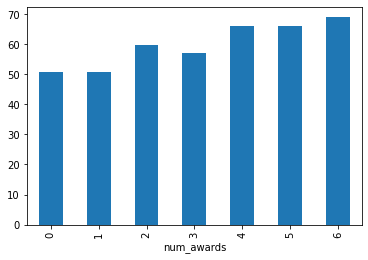

In [63]:
Awards.groupby('num_awards').math.mean().plot(kind = 'bar') #codice qui 

Evinciamo che la media di chi ha vinto 6 premi sia maggiore di quella di chi ne ha vinti 0, ma ad esempio quella di chi ha vinto 3 premi è minore di quella di chi ne ha vinti 2.

Verifichiamo con la correlazione. 

## Correlazione

Verifichiamolo, calcolando l'**indice di correlazione di Pearson** tra le varie features a disposizione. 

In [64]:
#codice qui
Awards.corr()

,id,num_awards,prog,math
id,1.000000,0.033111,-0.058029,0.219234
num_awards,0.033111,1.000000,0.098431,0.335234
prog,-0.058029,0.098431,1.000000,-0.150104
math,0.219234,0.335234,-0.150104,1.000000


Abbiamo conformato che ci sia una relazione tra il numero dei premi vinti e il voto in matematica.

## Box Plot

Esiste un modo alternativo di visualizzare la stessa cosa, ma prendendo non solo la media? 

Usate i box plot per vedere la distribuzione del dato.

funzione pandas boxplot (argomenti: column = 'colonna da visualizzare', by ='colonna rispetto a cui dividere').

Utilizzando l'attributo vert=False, potete visualizzare il diagramma a baffi. Fate anche questo!

<AxesSubplot:title={'center':'math'}, xlabel='num_awards'>

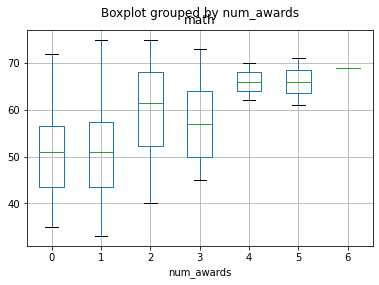

In [65]:
#codice qui
Awards.boxplot(column = 'math', by ='num_awards')

Questo box-plot ci da informazioni piu' ricche rispetto al'istogramma e piu' leggibili del grafico a dispersione.

Le scatole a sinistra sono piu' grandi quindi vuol dire che c'è piu' variabilità, che per i 4-5-6 premi vinti manca.

Inoltre i box non si intersecano troppo: il 4 e lo 0 ad esempio non si toccano.

I box plot ci danno informazioni sulla distribuzione, non solo sulla media. Ad occhio, vi sembra che ci possano essere gruppi con differenze statistiche significative? 
trovate due coppie. Una in cui vi aspettate differenza statistica significativa e una in cui non vi aspettate tale differenza. Eseguite quindi un t-test. 

**PRECISAZIONE T-TEST**

Ricordate, quando calcolate il p-value dovete confrontarlo con il valore di significativita' statistica. 
Quindi, se scegliete una confidenza di 0.95, dovete confrontare il p-value con 0.05. 
Lo stesso per altri valori. 
Questo vale sia per il t-test a una coda, che per il t-test a due code. 
Se il p-value e' maggiore della significativita', accetto l'ipotesi nulla.
Se il p-value e' minore, rigetto l'ipotesi nulla. 

## T-Test

Formuliamo ora un'ipotesi:

H0 = "Non ci sono differenze statistiche tra le medie matematiche di chi ha vinto un premio e di chi ne ha vinti zero".

A questo punto, l'ipotesi alternativa:

HA = "Ci sono differenze statistiche tra le medie matematiche di chi ha vinto un premio e di chi ne ha vinti zero"

Usiamo un t-test per verificare se questa ipotesi e' corretta.

In [81]:
#codice qui 
t_statistic, p_value = stats.ttest_1samp(a= Awards['math'][Awards['num_awards']==0], popmean= Awards['math'][Awards['num_awards']==1].mean(), alternative='two-sided')
print(t_statistic)
print(p_value)

-0.03765051772292881
0.9700734982387319


#### 0.97 > 0.95 quindi accetto quindi l'ipotesi nulla.

## Un altro Dataset

Adesso, spostiamoci su un altro dataset. 

Il dataset birthweight, contiene informazioni su neonati (settimana di gestazione alla nascita', peso, altezza, circonferenza cranica) e informazioni sui genitori (eta' madre, padre, altezza, fumatori, numero di sigarette fumate).

Importate il dataset. Chiamiamolo birth.


In [82]:
#codice qui 
birth = pd.read_csv('Birthweight_reduced_kg_R.csv') 
birth.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


Visualizziamo informazioni di base.

In [83]:
birth.describe()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,27.000000,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,1764.000000,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


## Distribuzione della settimana di gestazione al parto e del peso

Visualizziamo la distribuzione della settimana di gestazione al parto e la distribuzione del peso; per farlo utilizziamo un grafico a barre.

<AxesSubplot:>

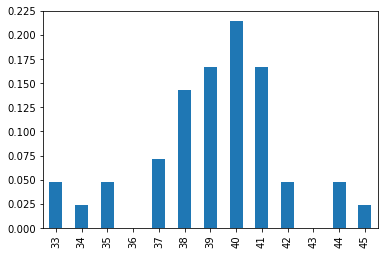

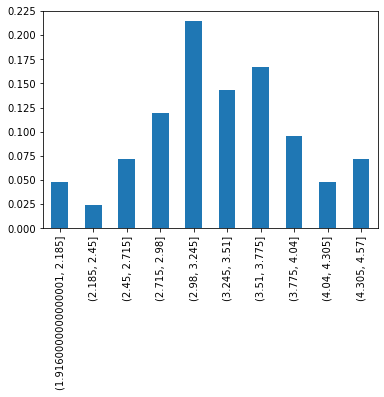

In [86]:
#codice qui 
gest = birth['Gestation'].value_counts(normalize=True).reindex(np.asarray(range(33,46)))
gest.plot(kind = 'bar')

plt.figure()

gest = birth['Birthweight'].value_counts(normalize=True,bins=10, sort=False)
gest.plot(kind = 'bar')

Notiamo che la distribuzione delle nascite ha il picco intorno alle 40 settimane di gestazione (circa 9 mesi), mentre il picco della distribuzione del peso è circa a 3kg.

## Grafico a Dispersione: Peso del bambino in funzione della settimana di gestazione

Visualizziamo ora il peso del bambino in funzione della settimana di gestazione. 

**Che tipo di visualizzazione usereste?**

un plot a barre, un istogramma, un grafico a dispersione o a linee? Utilizziamo un grafico a dispersione in quanto evidenzia la relazione tra 2 variabili.

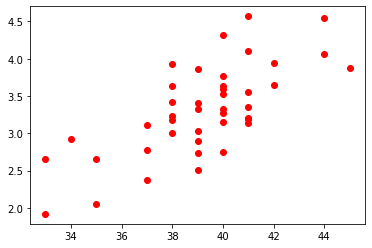

In [87]:
#codice qui 
plt.scatter(birth['Gestation'],birth['Birthweight'],color='r')

Questo e' un classico esempio dove un grafico a dispersione aiuta la comunicazione di un risultato. In effetti, ci si aspetta un aumento medio del peso di un bambino all'aumentare della settimana di gestazione a cui nasce. Ora plottiamo **sullo stesso grafico** anche la lunghezza alla nascita

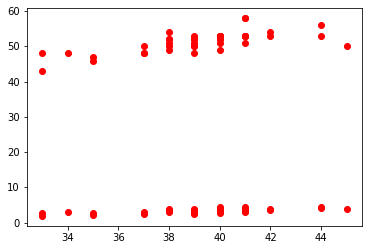

In [74]:
plt.scatter(birth['Gestation'],birth['Birthweight'],color='r')
#plt.figure()
plt.scatter(birth['Gestation'],birth['Length'],color='r')

### Standardizzazione dei due Grafici

Serve qualcosa prima di poter rappresentare i dati insieme, non trovate? 
Le scale sono molto diverse (cm e kg), dunque, occorre **standardizzare** il nostro dataframe. 

Fatelo, e ripetete il tutto.

**tip** Potete prendere il codice dallo scorso laboratorio. 

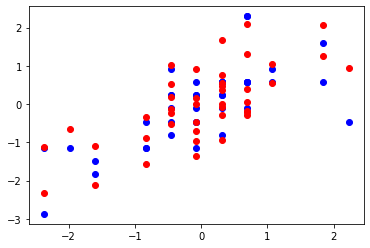

In [88]:
#codice qui 
from sklearn import preprocessing 
example_z_score = birth
df_scaled = pd.DataFrame(preprocessing.scale(example_z_score))

plt.scatter(df_scaled[4],df_scaled[1],color='b')
plt.scatter(df_scaled[4],df_scaled[2],color='r')

Facciamo la stessa cosa per la circonferenza della testa 

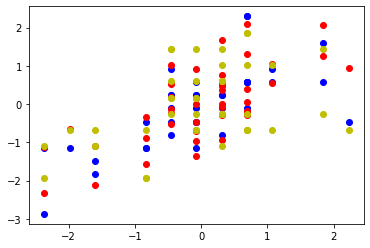

In [89]:
#codice qui 
plt.scatter(df_scaled[4],df_scaled[1],color='b')
plt.scatter(df_scaled[4],df_scaled[2],color='r')
plt.scatter(df_scaled[4],df_scaled[3],color='y')

Vediamo che anche qui l'andamento, a livello qualitativo, e' confermato. 
